# **Projeto de Aprendizado de Máquina**

## Integrantes
> Heitor Pupim Assuncao Toledo - 11372858

> João Lucas Pereira de Souza - 10994311

> Joel Felipe Coelho - 4865826

> Leonardo Zaniboni Silva - 11801049



O dataset escolhido para esse projeto é o de Dados de Previsão de AVC (Acidente Vascular Cerebral) que pode ser encontrado através do link abaixo:
https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

---

## **Contexto**
AVC significa Acidente Vascular Cerebral. É uma condição médica que ocorre quando o suprimento de sangue para uma parte do cérebro é interrompido ou reduzido, levando a danos nas células cerebrais devido à falta de oxigênio e nutrientes. Existem dois tipos principais de AVC:

- **AVC Isquêmico:** É o tipo mais comum de AVC e ocorre quando um vaso sanguíneo que fornece sangue ao cérebro é bloqueado por um coágulo de sangue ou por um estreitamento do vaso.

- **AVC Hemorrágico:** Nesse tipo de AVC, um vaso sanguíneo no cérebro se rompe, resultando em sangramento no cérebro.

Os AVCs são uma condição médica grave e podem ter consequências graves, como déficits neurológicos, paralisia, problemas de fala, perda de memória, entre outros. O tratamento imediato é crucial para minimizar os danos e as complicações associadas ao AVC. Segundo a Organização Mundial da Saúde (OMS), o AVC é a 2ª principal causa de morte no mundo, responsável por aproximadamente 11% do total de mortes. O objetivo deste projeto é prever se um paciente tem probabilidade de sofrer um derrame com base em vários parâmetros de entrada, como sexo, idade, presença de hipertensão, doença cardíaca, estado civil, tipo de trabalho, tipo de residência, nível médio de glicose no sangue, índice de massa corporal e status de tabagismo.
Cada linha do conjunto de dados contém informações relevantes sobre um paciente. A tabela inclui as seguintes informações:

**Informações contidas na tabela**
1. id: identificador único
2. gender: "Male", "Female" ou "Other"
3. age: idade do paciente
4. hypertension: 0 se o paciente não tem hipertensão, 1 se o paciente tem hipertensão
5. heart_disease: 0 se o paciente não tiver nenhuma doença cardíaca, 1 se o paciente tiver uma doença cardíaca
6. ever_married: "No" ou "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" ou "Self-employed"
8. Residence_type: "Rural" ou "Urban"
9. avg_glucose_level: nível médio de glicose no sangue
10. bmi: índice de massa corporal
11. smoking_status: "formerly smoked", "never smoked", "smokes" ou "Unknown"*
12. stroke: 1 se o paciente teve AVC ou 0 se não

**Observação:** "Unknown" em smoking_status significa que as informações não estão disponíveis para este paciente, ou seja, teremos que lidar com essa informação na etapa de pré processamento.

---

## Importação das bibliotecas e recursos necessários

As seguintes bibliotecas foram importadas para o projeto:

*- pandas:* Uma biblioteca de análise de dados que fornece estruturas de dados e ferramentas para manipulação e análise de dados. <br>
*- numpy:* Uma biblioteca numérica que fornece suporte para trabalhar com arrays multidimensionais e funções matemáticas. <br>
*- matplotlib.pyplot:* Uma biblioteca de visualização de dados que fornece funções para criar gráficos e visualizações. <br>
*- pydotplus:* Uma biblioteca para a geração e visualização de grafos. <br>
*- seaborn:* Uma biblioteca de visualização de dados baseada no matplotlib que fornece uma interface de alto nível para criar gráficos estatísticos atraentes. <br> <br>

Em relação aos classificadores e outras funcionalidades:

*- GaussianNB:* Implementa o algoritmo Naive Bayes para classificação baseado no teorema de Bayes. <br>
*- MLPClassifier:* Implementa uma rede neural multicamada para classificação. <br>
*- GridSearchCV:* Uma classe que realiza uma busca exaustiva em uma grade de hiperparâmetros para encontrar os melhores parâmetros para um estimador. <br>
*- KNeighborsClassifier:* Implementa o algoritmo de classificação K-Vizinhos Mais Próximos (K-Nearest Neighbors). <br>
*- DecisionTreeClassifier:* Implementa um algoritmo de árvore de decisão para classificação. <br>
*- MinMaxScaler:* Um escalador que normaliza os recursos de forma que fiquem dentro de um intervalo específico. <br>

Além disso, também foram importados outros módulos e funções relacionados ao treinamento, avaliação e visualização de modelos de aprendizado de máquina, como train_test_split, export_graphviz, cross_val_score, StringIO, Image. Essas bibliotecas e funcionalidades são essenciais para realizar tarefas como divisão de dados, criação de visualizações de árvore de decisão e avaliação de modelos.

---

In [1]:
# Import das bibliotecas necessárias para o aprendizado
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pydotplus
import seaborn as sns

# Classificadores e afins..
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score

from six import StringIO
from IPython.display import Image

## Preview do dataset

In [2]:
# Lendo  o arquivo CSV que contém o dataset escolhido, o qual está disponível em ../dataset/healthcare-dataset-stroke-data.csv
dataset = pd.read_csv('../dataset/healthcare-dataset-stroke-data.csv', sep=',', index_col=0, na_values='?')
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


---

# Pré-processamento dos dados

### **1) Tratamento de valores ausentes**

Na etapa de pré-processamento dos dados, é necessário lidar com valores ausentes no dataset. Valores ausentes podem ocorrer quando informações faltam ou não estão disponíveis para determinadas instâncias ou atributos. Uma abordagem comum é eliminar as linhas que possuem dados faltantes, também conhecidas como instâncias incompletas. Isso significa que as linhas que contêm pelo menos um valor ausente serão removidas do conjunto de dados.

Ao remover as linhas com dados faltantes, garante-se que todas as instâncias no conjunto de dados tenham informações completas para os atributos relevantes. No entanto, é importante considerar que a remoção de linhas com dados faltantes pode levar à perda de informações potencialmente úteis, especialmente se as instâncias removidas possuírem outros atributos valiosos. 

Um ponto a se destacar é que removeremos as linhas com dados faltantes apenas para os atributos que serão utilizados no treinamento dos modelos. Isso significa que removeremos as linhas com dados faltantes para o atributo "smoking_status", pois esse atributo **será** utilizado no treinamento dos modelos.

In [3]:
# Elimina as linhas com dados faltantes, além das linhas que apresentam o valor "Unknown" na coluna "smoking_status"
dataset = dataset.dropna(axis=0)
dataset = dataset[dataset['smoking_status'] != 'Unknown']
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0


No total, o dataset possui 5110 linhas, todavia, como podemos observar, o atributo "smoking_status" possui 1684 valores ausentes. Após a remoção das linhas com dados faltantes, o dataset passará a ter 3426 linhas.

---

### **2) Verificando balanceamento das classes**

Verificar o balanceamento das classes é um passo crucial durante o pré-processamento dos dados. O balanceamento das classes refere-se à distribuição proporcional dos exemplos de cada classe dentro do conjunto de dados. Quando há um desequilíbrio significativo entre as classes, ou seja, algumas classes têm um número muito maior de exemplos do que outras, podem surgir desafios na modelagem e avaliação do desempenho do modelo de aprendizado de máquina.

Se houver um desbalanceamento substancial entre as classes, pode ser necessário aplicar técnicas de pré-processamento para lidar com esse desequilíbrio. *Existem várias abordagens para balancear as classes, como oversampling (aumentar o número de exemplos das classes minoritárias), undersampling (reduzir o número de exemplos das classes majoritárias) ou uma combinação de ambas as técnicas.*

Por outro lado, **em certos casos, pode ser indicado manter a proporção natural das classes. Isso ocorre quando a distribuição desigual é uma característica legítima do problema em estudo e é importante refletir essa disparidade nas classes no modelo.**

Em vista disso, iremos analisar o balanceamento das classes no dataset. O atributo "stroke" é o atributo de classe, ou seja, é o atributo que queremos prever. **Esse atributo possui duas classes: 0 e 1. A classe 0 significa que o paciente não teve AVC e a classe 1 significa que o paciente teve AVC.**

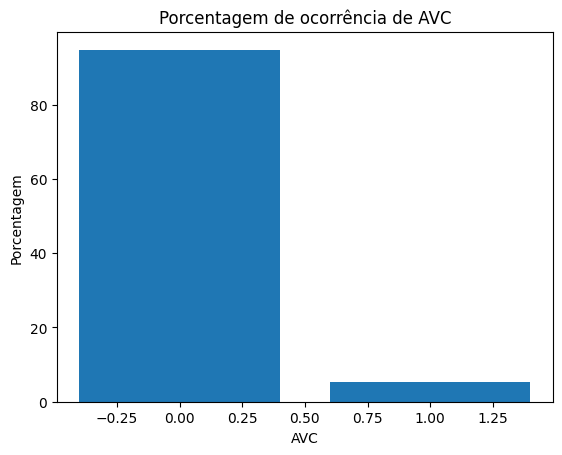

In [4]:
# Plota um gráfico com a quantidade de indivíduos que apresentaram AVC e que não apresentaram AVC
stroke_count = dataset["stroke"].value_counts()
percentage = stroke_count / len(dataset) * 100

stroke_count

plt.bar(percentage.index, percentage.values)
plt.xlabel('AVC')
plt.ylabel('Porcentagem')

plt.title('Porcentagem de ocorrência de AVC')

plt.show()

Como podemos ver, **a quantidade de indivíduos que tiveram derrame é muito inferior, o que representa bem o contexto real dessa condição no mundo.**

*Segundo dados do Global Burden of Diseases (GBD) Study, em 2019 foram registrados 12,2 milhões de casos incidentes de AVC em todo o mundo, com 6,55 milhões de mortes relacionadas a essa condição. Globalmente, o AVC é a segunda causa de morte, representando cerca de 11% das mortes totais. No Brasil, a proporção entre doenças cardíacas (IAM) e AVC foi invertida apenas recentemente, a partir de 2016, com o AVC se tornando a segunda principal causa de morte, de acordo com dados do DATASUS.*

**Fonte:** https://avc.org.br/sobre-a-sbavc/numeros-do-avc-no-brasil-e-no-mundo/

---

Dado o contexto realista e a distribuição desigual desses casos, **é justificado manter a proporção natural do problema no conjunto de dados.** Isso significa que não faremos nenhum ajuste para equilibrar artificialmente as classes, pois isso refletiria melhor a realidade e os desafios enfrentados no diagnóstico e prevenção de AVC.

Ao manter a proporção natural das classes, garantimos que o modelo seja treinado e avaliado em um cenário mais próximo do que ocorre na prática. No entanto, é importante estar ciente de que essa abordagem pode afetar a capacidade do modelo de lidar com as classes minoritárias, pois a falta de exemplos pode tornar o aprendizado dessas classes mais desafiador."<br>

**Sendo assim, visando manter uma distribuição realista, vamos manter a proporção natural do problema.**

---

### **3) Normalizando os dados**

Na etapa de pré-processamento dos dados, é necessário realizar a normalização dos dados para permitir que a maioria dos algoritmos de classificação trabalhe com eles de forma adequada. No caso específico do nosso projeto, precisamos lidar com dados categóricos, ou seja, variáveis que representam diferentes categorias ou classes.

**Para transformar esses dados categóricos em dados numéricos, utilizaremos o método `pd.get_dummies()` da biblioteca pandas.** Esse método permite a aplicação da técnica conhecida como codificação one-hot (one-hot encoding), **em que cada categoria é convertida em uma nova coluna binária, representando a presença ou ausência daquela categoria para cada exemplo.**

> Ao aplicar o `pd.get_dummies()` ao nosso dataset, ele irá analisar as colunas que contêm dados categóricos e criar novas colunas binárias correspondentes a cada categoria única encontrada. Dessa forma, as informações categóricas serão convertidas em informações numéricas, permitindo que os algoritmos de classificação possam utilizá-las adequadamente.

Esse método de transformação é importante porque a maioria dos algoritmos de classificação requer que os dados sejam numéricos para realizar cálculos e inferências. Ao realizar a codificação one-hot, garantimos que todas as informações relevantes das variáveis categóricas sejam consideradas durante o processo de aprendizado e classificação.

**Portanto, ao utilizar `dataset = pd.get_dummies(dataset)`, estaremos transformando nossos dados categóricos em dados numéricos por meio da criação de colunas binárias para cada categoria, preparando-os adequadamente para a etapa de modelagem e classificação dos algoritmos de aprendizado de máquina.**

In [5]:
dataset = pd.get_dummies(dataset)
dataset

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,,,,,,,,,,,,,,,,,,,,,
9046,67.0,0,1,228.69,36.6,1,False,True,False,False,...,False,False,True,False,False,False,True,True,False,False
31112,80.0,0,1,105.92,32.5,1,False,True,False,False,...,False,False,True,False,False,True,False,False,True,False
60182,49.0,0,0,171.23,34.4,1,True,False,False,False,...,False,False,True,False,False,False,True,False,False,True
1665,79.0,1,0,174.12,24.0,1,True,False,False,False,...,False,False,False,True,False,True,False,False,True,False
56669,81.0,0,0,186.21,29.0,1,False,True,False,False,...,False,False,True,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68398,82.0,1,0,71.97,28.3,0,False,True,False,False,...,False,False,False,True,False,True,False,False,True,False
45010,57.0,0,0,77.93,21.7,0,True,False,False,False,...,False,False,True,False,False,True,False,False,True,False
44873,81.0,0,0,125.20,40.0,0,True,False,False,False,...,False,False,False,True,False,False,True,False,True,False


Após aplicar o método `pd.get_dummies(dataset)`, **observamos que o número de colunas aumentou de 11 para 21.** Essa expansão ocorre porque o método cria novas colunas binárias para cada categoria presente nos dados categóricos, representando a presença ou ausência de cada categoria para cada exemplo.

**No entanto, é importante destacar que as colunas criadas pelo `pd.get_dummies()` representam valores "true" ou "false"** para indicar a presença ou ausência de uma determinada categoria. **Para que esses valores sejam escalados e estejam em uma faixa numérica apropriada, utilizamos o método `MinMaxScaler()`.**

**Após aplicar o `MinMaxScaler()`, a variável X é atualizada para conter os dados escalados numericamente.**

> A linha X = dataset.loc[:, dataset.columns != 'num'] é usada para selecionar todas as colunas, exceto a coluna de destino (target) 'num' (assumindo que 'num' é o nome da coluna que contém os rótulos/targets). <br>

> Em seguida, a linha `X = pd.DataFrame(MinMaxScaler().fit_transform(X), columns=X.columns)` aplica o `MinMaxScaler()` para normalizar os valores de todas as colunas selecionadas em X e substitui X pelos dados normalizados em um novo DataFrame.

In [6]:
X = dataset.loc[:, dataset.columns != 'num']
X = pd.DataFrame(MinMaxScaler().fit_transform(X), columns=X.columns)
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.791667,0.0,1.0,0.801265,0.311801,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.972222,0.0,1.0,0.234512,0.260870,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.541667,0.0,0.0,0.536008,0.284472,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.958333,1.0,0.0,0.549349,0.155280,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.986111,0.0,0.0,0.605161,0.217391,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3421,1.000000,1.0,0.0,0.077786,0.208696,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3422,0.652778,0.0,0.0,0.105300,0.126708,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3423,0.986111,0.0,0.0,0.323516,0.354037,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3424,0.347222,0.0,0.0,0.128658,0.237267,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


Portanto, agora todos os atributos não números tiverem seus valores transformados, tornando-se atributos categóricos. **Dessa forma, estão preparados para serem utilizados no treinamento e aprendizado do modelo de aprendizado de máquina.**

---

### **4) Correlação entre atributos**

A correlação entre atributos é uma medida estatística que nos permite identificar relações entre diferentes fatores presentes nos dados. *No contexto do nosso projeto, analisar a correlação é importante para compreender a influência de cada atributo na ocorrência de AVC, buscando assim modelos mais precisos e insights relevantes para prevenção dessa doença tão recorrente nos dias atuais.*

Para realizar essa análise de correlação, utilizaremos a biblioteca `seaborn`. O código em questão tem como objetivo visualizar a correlação entre os atributos do dataset em relação à variável alvo "stroke" (AVC).

Primeiro, calculamos a correlação entre cada atributo e a variável "stroke" usando `corr = dataset.corr()["stroke"].sort_values(ascending=True)`. Isso nos fornece uma série ordenada de correlações em ordem crescente. Em seguida, removemos a própria variável "stroke" da série de correlações usando `corr.drop("stroke", inplace=True).`

Em seguida, utilizamos a função `sns.barplot()` para criar um gráfico de barras. **O eixo x do gráfico representa os valores de correlação, enquanto o eixo y mostra os atributos correspondentes. Isso nos permite visualizar de forma sucinta a força e a direção da correlação entre cada atributo e a variável "stroke".**

Por fim, adicionamos rótulos aos eixos do gráfico usando `plt.ylabel('Attributes') e plt.xlabel('Correlation with stroke')`, indicando o significado dos eixos. Por fim, chamamos `plt.show()` para exibir o gráfico.

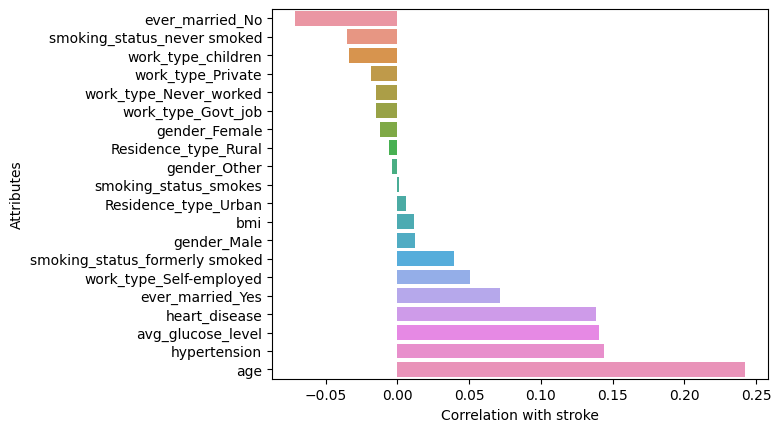

In [7]:
corr = dataset.corr()["stroke"].sort_values(ascending=True)
corr.drop("stroke", inplace=True)

sns.barplot(x=corr, y=corr.index)
plt.ylabel('Attributes')
plt.xlabel('Correlation with stroke')
plt.show()

Analisando a figura acima, pode-se ver alguns pontos interessantes :

-  **A idade possui uma taxa de correlação relativamente alta (0.25) com a ocorrência do AVC.** *Além disso fatores como a hipertensão (0.14) e doenças cardíaca (0.13) estão intrisecamente ligadas ao surgimento dessa doença.*

- *O atributo que informa se o homem já foi casado alguma vez na vida possui uma correlação relativamente alta (0.07) com a ocorrência de AVC.* Contudo, deve-se atentar a atributos como este, já que não é necessário que haja uma causalidade direta, tendo como base que outras variáveis não consideradas podem estar envolvidas. Por exemplo, quanto maior a idade, maior a chance da pessoa ter se casado, o que leva a uma maior probabilidade de se ter o AVC de forma indireta.

---

Após calcular a correlação entre cada atributo e a variável "stroke", **plotamos um gráfico que exibe a correlação entre todos os atributos do dataset. Essa visualização é útil para analisar as relações entre os atributos e identificar possíveis padrões ou conexões significativas entre eles.**

> Analisar esses fatores é importante não apenas para compreender a influência de cada atributo na ocorrência de AVC, mas também para identificar atributos que possam ser redundantes ou apresentar correlações muito altas entre si. A identificação desses atributos redundantes é relevante para evitar a inclusão de informações duplicadas ou excessivamente similares no modelo de aprendizado de máquina, o que pode prejudicar sua capacidade de generalização e interpretabilidade.

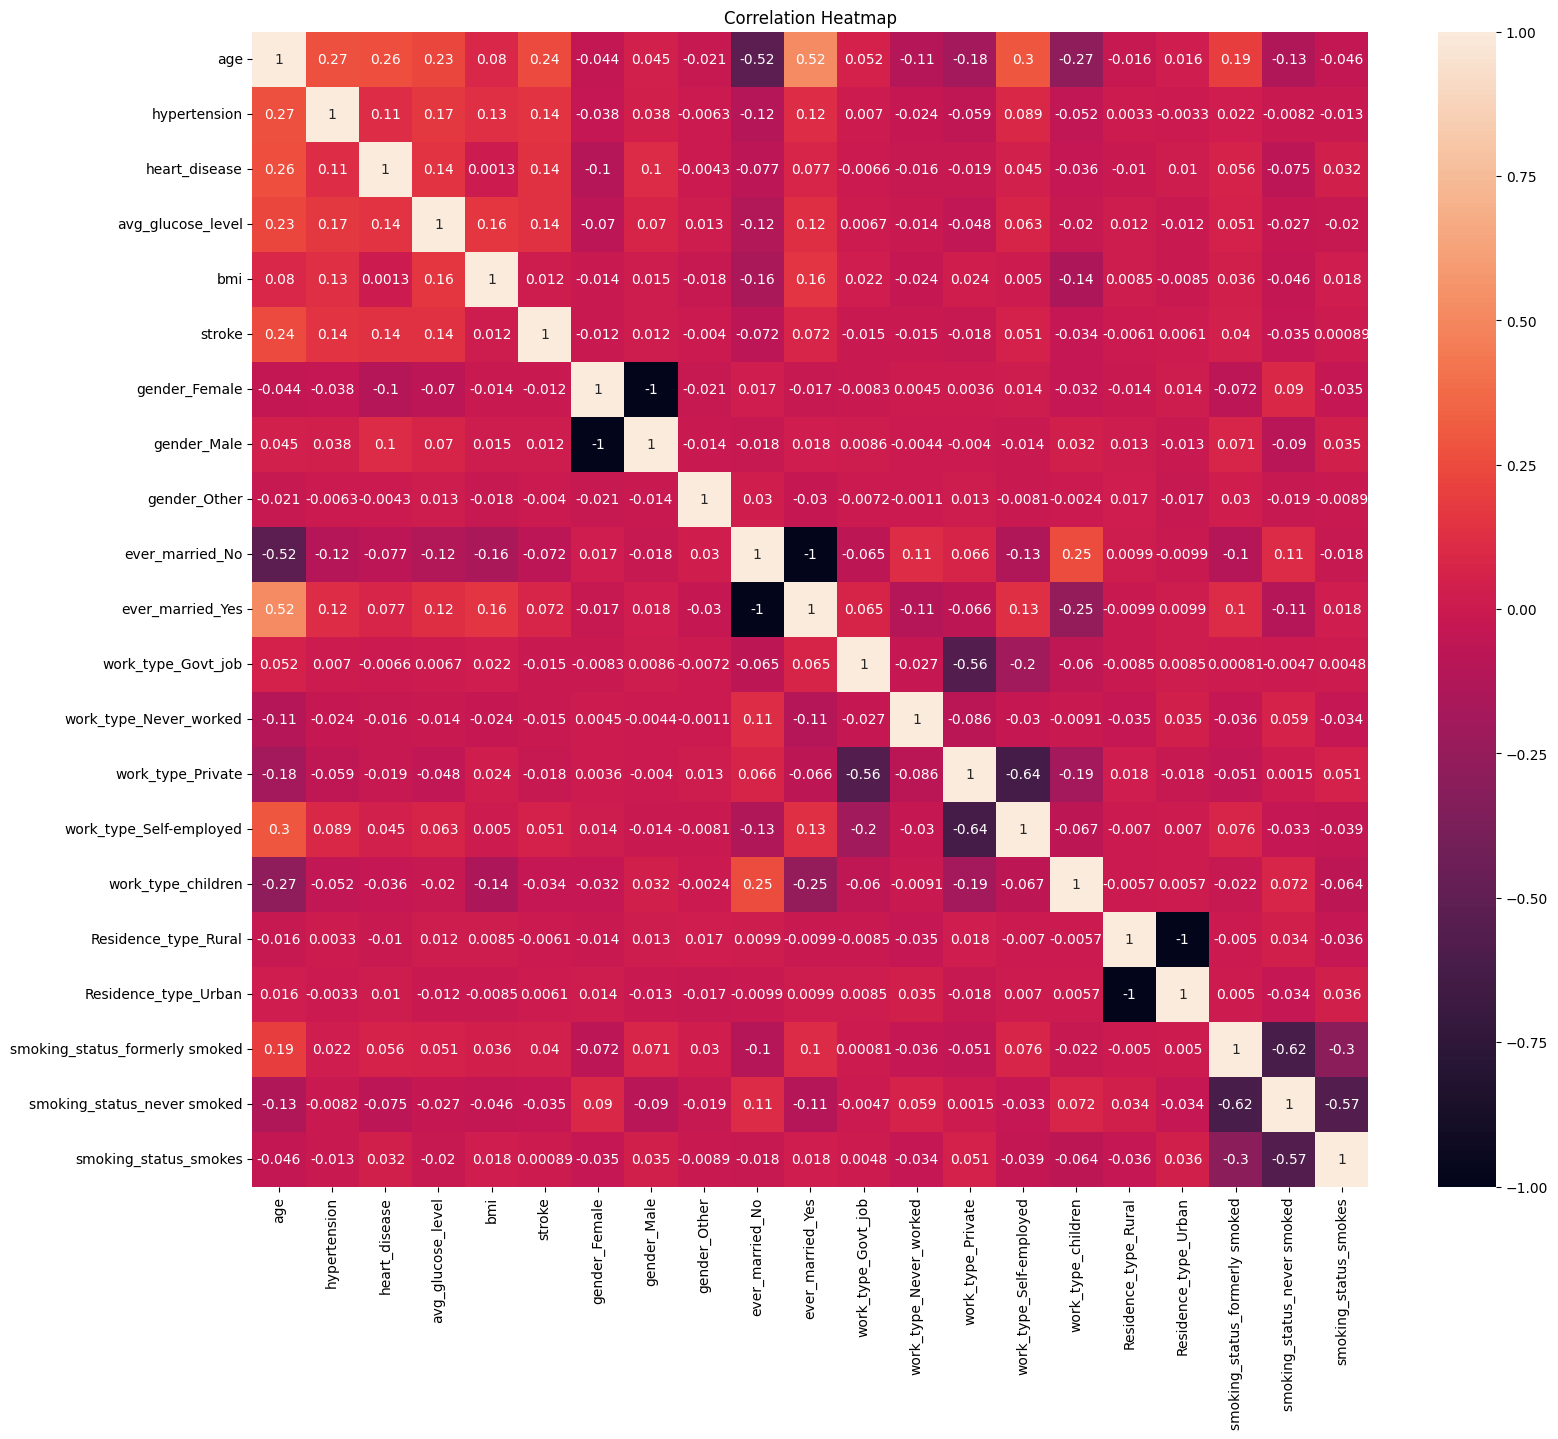

In [8]:
plt.figure(figsize=(18, 15))
sns.heatmap(dataset.corr(),annot=True)
plt.title("Correlation Heatmap")
plt.show()

**Como pode ser observado, o atributo "age" é o que tem maior correlação com AVC**. <br>

Podemos representar essa correlação com o histograma abaixo:

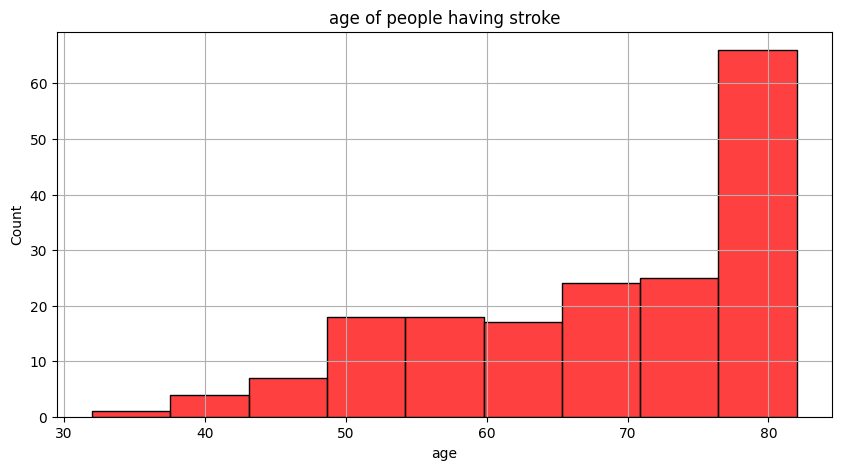

In [9]:
plt.figure(figsize=(10,5))
strokes_dataset = dataset[dataset['stroke'] == 1]
sns.histplot(strokes_dataset['age'], color="red")
plt.title("age of people having stroke")
plt.grid()

Com a conclusão da fase de pré-processamento dos dados, estamos prontos para avançar para a próxima etapa do nosso projeto. **Agora, iremos aplicar algoritmos de classificação aos dados preparados, com o objetivo de construir um modelo capaz de prever a ocorrência de AVC com base nos atributos disponíveis.**

---

# Aplicar algoritmos de classificação

Agora que os dados foram preparados, podemos aplicar algoritmos de classificação aos dados preparados, com o objetivo de construir um modelo capaz de prever a ocorrência de AVC com base nos atributos disponíveis.

**Nessa fase, utilizaremos diversos algoritmos de classificação, como o Naive Bayes, MLP (Multilayer Perceptron), K-Nearest Neighbors (KNN), Decision Tree, entre outros. Cada algoritmo possui suas próprias características e suposições subjacentes, o que pode impactar o desempenho e a precisão das previsões.**

> Ao aplicar os algoritmos de classificação, utilizaremos uma parte dos dados para treinamento do modelo e outra parte para avaliação e validação. Essa abordagem permite estimar o desempenho do modelo em dados não vistos anteriormente e fazer ajustes necessários para melhorar sua capacidade de generalização.

*Ao final dessa etapa, poderemos selecionar o algoritmo de classificação mais adequado para o nosso problema,* com base em critérios como precisão, recall, F1-score, ou outros indicadores relevantes para a tarefa de previsão de AVC. O modelo resultante poderá ser utilizado para fazer previsões em novos dados e contribuir para a identificação e prevenção de casos de AVC.

Portanto, após a conclusão da fase de pré-processamento dos dados, estamos prontos para aplicar algoritmos de classificação e prosseguir com o desenvolvimento do nosso modelo de aprendizado de máquina.

---

### **1) Aplicar o algoritmos de classificação com Árvores de Decisão**

**Uma árvore de decisão é uma representação visual que mostra as escolhas e caminhos a serem seguidos a partir de um nó raiz até as folhas,** na qual são tomadas as decisões finais. Cada nó representa um atributo ou característica dos dados, e os ramos que se ramificam a partir dele representam as diferentes possibilidades ou valores que esse atributo pode assumir. Essa estrutura em formato de árvore permite mapear o fluxo de decisões em um processo de tomada de decisão.

> No entanto, a criação das regras que compõem a árvore de decisão requer o uso de algoritmos de Machine Learning. Esses algoritmos analisam os dados de treinamento e aprendem a definir as melhores regras de divisão nos nós da árvore, de forma a maximizar a precisão das previsões ou classificações.

*Para construir uma árvore de decisão, é necessário ter os dados previamente separados em um conjunto de atributos independentes e a classe dependente*.* Os atributos independentes são as características que serão utilizadas para fazer as previsões ou classificações, enquanto a classe dependente é a variável que queremos prever ou classificar com base nesses atributos.

Com base nessa estrutura de dados, podemos aplicar algoritmos de aprendizado de máquina, como o algoritmo de árvore de decisão, para criar a árvore e definir as regras que irão orientar a tomada de decisão com base nos atributos disponíveis.

In [10]:
# Separando o dataset no conjunto de atributos X e classe y.
X = dataset.loc[:, dataset.columns != 'stroke']
y = np.array(dataset.loc[:, dataset.columns == 'stroke']).ravel()

> Para criar os dados de treinamento e de testes, poderiamos utilizar a função `train_test_split` como descrito abaixo. **No entanto, isso não será necessário, uma vez que iremos aplicar a validação cruzada (10-fold cross validation),** a qual fornece uma estimativa mais confiável da acurácia do modelo em comparação com uma única divisão de treinamento/teste.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

Já com os dados de testes em mão, pode-se criar um modelo de árvore de decisão. No bloco abaixo, foi passado o *parâmetro 'gini' como critério do algortimo - o que implica que será utilizado o índice de impureza de Gini para calcular a qualidade da divisão.* **Já o termo "random_state" apenas garante a aleatoriedade do algoritmo.**

In [12]:
clf = DecisionTreeClassifier(criterion='gini', random_state=42)  # Criando o classificador da Árvore de Decisão

Pode-se plotar a árvore para visualizar seu tamanho.

In [13]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('diabetes.png')
Image(graph.create_png())

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

---

Vamos realizar agora, o treino do modelo, fazendo uso da validação cruzada.

**A validação cruzada é uma técnica que permite avaliar o desempenho do modelo em um conjunto de dados de forma mais precisa.** Ela consiste em dividir o conjunto de dados em k partes iguais, chamadas de folds, sendo k um valor determinado previamente.

No código apresentado, utilizamos a função `cross_val_score` para realizar a validação cruzada. Essa função recebe como parâmetros o classificador `clf` *(no caso, o algoritmo de árvore de decisão)*, os atributos X e a variável alvo y. O parâmetro `cv` *é utilizado para definir o número de folds, sendo 10 no exemplo.*

**A função cross_val_score executa o treinamento e a avaliação do modelo utilizando a validação cruzada. Ela retorna uma lista de pontuações (scores) obtidas para cada fold do conjunto de dados.** Essas pontuações podem representar métricas de desempenho, como acurácia, precisão, recall, entre outras, dependendo do classificador e da tarefa em questão.

> No código, a variável dt_scores armazena as pontuações obtidas para cada fold do modelo treinado utilizando a validação cruzada. Essas pontuações podem ser utilizadas posteriormente para analisar a performance média do modelo e avaliar sua consistência em diferentes conjuntos de dados.

In [14]:
dt_scores = cross_val_score(clf, X, y, cv=10)
dt_scores

array([0.89795918, 0.90379009, 0.88921283, 0.91253644, 0.89504373,
       0.9154519 , 0.90350877, 0.89181287, 0.92105263, 0.9122807 ])

Por último, pode-se calcular a acurácia do modelo.

In [15]:
tree_classifier_accuracy = dt_scores.mean()
print(f'A acurácia do Classificador é: {tree_classifier_accuracy :.2%}')

A acurácia do Classificador é: 90.43%


---

### **2) Aplicar o algoritmos de classificação com K-Nearest Neighbors (KNN)**

O algoritmo de classificação com K-Nearest Neighbors (KNN) é um classificador que tem como base para a classificação a similaridade de um dado com seus vizinhos mais próximos. **Neste âmbito, quando um conjunto de dados a ser classificado é apresentado para o algortimo, o mesmo calcula a distância entre os dados novos com os já usados no treinamento.** *A partir destas distâncias, a classificação ocorre com base nos 'k' vizinhos mais próximos dos dados introduzidos.*


Na implementação realizada, a variável knn é instanciada como um objeto da classe KNeighborsClassifier. Em seguida, a função `GridSearchCV` faz uma busca em grade com o intuito de achar a melhor combinação de parâmetros de um classificador KNN. 

Nessa função em específico, é passado como parâmetro:

1. O objeto do classificador `knn`;
2. Um dicionário que contém a quantidade de vizinhos a serem variadas para a escolha do melhor parâmetro; 
3. Um número relativo a quantidade de partições utilizadas na validação cruzada e a métrica de avaliação utilizada para medir o desempenho do classificador.

**Em seguida, o método fit treina o modelo com os dados de treinamento.**

In [16]:
parameters = {'n_neighbors' : [1, 3, 5, 7, 9, 11, 13], 'weights' : ['uniform', 'distance']}

knn = KNeighborsClassifier()
gs = GridSearchCV(knn, parameters, cv=10, scoring='accuracy')
gs.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

Depois de realizada a busca em grade, pode-se acessar o atributo cv_results - que contém informações relevantes das combinações de parâmetros testadas. Para melhor visualização, utilizou-se um dataframe para dispor os resultados em uma tabela.

In [17]:
results = pd.DataFrame(gs.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005600,0.000490,0.042400,0.053876,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",0.909621,0.903790,0.912536,0.935860,0.897959,0.918367,0.909357,0.912281,0.903509,0.891813,0.909509,0.011424,13
1,0.005600,0.000489,0.008100,0.000538,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",0.909621,0.903790,0.912536,0.935860,0.897959,0.918367,0.909357,0.912281,0.903509,0.891813,0.909509,0.011424,13
2,0.005600,0.000491,0.024900,0.000830,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.944606,0.932945,0.938776,0.935860,0.930029,0.941691,0.938596,0.947368,0.938596,0.923977,0.937244,0.006565,11
3,0.005401,0.000662,0.008399,0.001019,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.944606,0.932945,0.938776,0.935860,0.930029,0.941691,0.935673,0.947368,0.935673,0.923977,0.936660,0.006549,12
4,0.005999,0.000447,0.027700,0.007511,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.941691,0.941691,0.944606,0.935860,0.944606,0.950437,0.947368,0.947368,0.938596,0.929825,0.942205,0.005828,9
5,0.005600,0.000490,0.008500,0.000670,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.944606,0.938776,0.944606,0.938776,0.941691,0.950437,0.944444,0.947368,0.938596,0.929825,0.941913,0.005479,10
6,0.005900,0.000539,0.024800,0.000600,7,uniform,"{'n_neighbors': 7, 'weights': 'uniform'}",0.944606,0.944606,0.944606,0.947522,0.950437,0.950437,0.947368,0.947368,0.938596,0.938596,0.945415,0.003968,7
7,0.006101,0.001300,0.009099,0.001758,7,distance,"{'n_neighbors': 7, 'weights': 'distance'}",0.944606,0.944606,0.944606,0.947522,0.947522,0.953353,0.944444,0.947368,0.938596,0.938596,0.945122,0.004132,8
8,0.005500,0.000670,0.025600,0.001200,9,uniform,"{'n_neighbors': 9, 'weights': 'uniform'}",0.947522,0.947522,0.947522,0.947522,0.947522,0.947522,0.950292,0.944444,0.947368,0.947368,0.947460,0.001310,4
9,0.006100,0.000539,0.008800,0.000980,9,distance,"{'n_neighbors': 9, 'weights': 'distance'}",0.947522,0.947522,0.947522,0.947522,0.950437,0.947522,0.947368,0.947368,0.947368,0.947368,0.947752,0.000898,3


Posteriormente, filtrou-se a tabela para se ter apenas os parâmetros mais importantes. Neste âmbito, foi deixada apenas as colunas referentes as chaves:

**'params':** Refere-se a combinação de parâmetros em questão

**'mean_test_score':** Pontuação média da validação cruzada 

**'std_test_score':** Desvio padrão das pontuações da validação cruzada

**'rank_test_score':** Ranking das pontuações da validação cruzada


In [18]:
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results[view].sort_values(by='rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
11,"{'n_neighbors': 11, 'weights': 'distance'}",0.948044,0.001163,1
13,"{'n_neighbors': 13, 'weights': 'distance'}",0.948044,0.001163,1
9,"{'n_neighbors': 9, 'weights': 'distance'}",0.947752,0.000898,3
8,"{'n_neighbors': 9, 'weights': 'uniform'}",0.947460,0.001310,4
10,"{'n_neighbors': 11, 'weights': 'uniform'}",0.947460,0.001310,4
12,"{'n_neighbors': 13, 'weights': 'uniform'}",0.947168,0.000910,6
6,"{'n_neighbors': 7, 'weights': 'uniform'}",0.945415,0.003968,7
7,"{'n_neighbors': 7, 'weights': 'distance'}",0.945122,0.004132,8
4,"{'n_neighbors': 5, 'weights': 'uniform'}",0.942205,0.005828,9
5,"{'n_neighbors': 5, 'weights': 'distance'}",0.941913,0.005479,10


In [19]:
gs.best_estimator_

KNeighborsClassifier(n_neighbors=11, weights='distance')

In [20]:
knn_classifier_accuracy = gs.best_score_
print(f'A acurácia do Classificador é: {knn_classifier_accuracy :.2%}')

A acurácia do Classificador é: 94.80%


---

### **3) Aplicar o algoritmos de classificação com Multilayer Perceptron (MLP)**


**O MLP (Multilayer Perceptron) é um algoritmo de classificação que se baseia em um modelo inspirado no funcionamento do cérebro humano.** Ele é capaz de aprender a reconhecer padrões e fazer previsões com base em dados.

> O MLP é composto por várias camadas de "neurônios" interconectados, que processam as informações de entrada e geram uma resposta de saída. Cada neurônio recebe as informações de entrada, realiza um cálculo e passa a informação para o próximo neurônio, até chegar à camada de saída, onde é feita a classificação final.

Durante o treinamento, *o MLP ajusta os "pesos" das conexões entre os neurônios para que o modelo seja capaz de fazer previsões corretas. Isso é feito comparando as respostas do modelo com os exemplos corretos fornecidos durante o treinamento e realizando ajustes nos pesos para melhorar as previsões.*

Na implementação realizada, a variável mlp é instanciada como um objeto da classe MLPClassifier. Em seguida, a função `GridSearchCV` faz uma busca em grade com o intuito de achar a melhor combinação de parâmetros de um classificador MLP.

Nessa função em específico, é passado como parâmetro:


1. O objeto do classificador `mlp`;
2. Um dicionário que contém a quantidade de vizinhos a serem variadas para a escolha do melhor parâmetro;
3. Um número relativo a quantidade de partições utilizadas na validação cruzada e a métrica de avaliação utilizada para medir o desempenho do classificador.

**Em seguida, o método fit treina o modelo com os dados de treinamento.**

In [21]:
parameters = {'hidden_layer_sizes' : [(5), (8), (15), (5, 3), (8, 5), (10, 5)],
              'max_iter' : [3000], 'random_state' : [42]}

mlp = MLPClassifier()
gs_mlp = GridSearchCV(mlp, parameters, cv=10, scoring='accuracy')
gs_mlp.fit(X, y)

GridSearchCV(cv=10, estimator=MLPClassifier(),
             param_grid={'hidden_layer_sizes': [5, 8, 15, (5, 3), (8, 5),
                                                (10, 5)],
                         'max_iter': [3000], 'random_state': [42]},
             scoring='accuracy')

In [22]:
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results = pd.DataFrame(gs_mlp.cv_results_)
results[view].sort_values(by='rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
3,"{'hidden_layer_sizes': (5, 3), 'max_iter': 300...",0.947460,0.000075,1
1,"{'hidden_layer_sizes': 8, 'max_iter': 3000, 'r...",0.947460,0.002285,2
0,"{'hidden_layer_sizes': 5, 'max_iter': 3000, 'r...",0.946876,0.002214,3
2,"{'hidden_layer_sizes': 15, 'max_iter': 3000, '...",0.946876,0.002885,3
5,"{'hidden_layer_sizes': (10, 5), 'max_iter': 30...",0.946292,0.003975,5
4,"{'hidden_layer_sizes': (8, 5), 'max_iter': 300...",0.946290,0.003552,6


In [23]:
gs.best_estimator_

KNeighborsClassifier(n_neighbors=11, weights='distance')

In [24]:
mlp_classifier_accuracy = gs.best_score_
print(f'A acurácia do Classificador é: {mlp_classifier_accuracy :.2%}')

A acurácia do Classificador é: 94.80%


---

### **4) Aplicar o algoritmos de classificação com Naive-Bayes**

**O algoritmo de classificação de Naive-Bayes assume que todas as features são independentes entre si e que todas elas são igualmente relevantes para o resultado final** - *ou seja, isto implica que será necessário utilizar apenas uma única probabilidade para cada atributo -*o que facilita e simplifica o cálculo do modelo.

> Basicamente, o algoritmo se pauta no teorema de Bayes, que descreve como calcular a probabilidade condicional de uma classe levando em conta a ocorrência de determinados atributos presentes no treinamento.

A priori, **o algoritmo gera uma tabela listando as probabilidades com base na frequência com que cada classe ocorre no conjunto de treinamento.** A partir desta tabela, o algoritmo seleciona a classe com a maior probabilidade como a classe prevista para a nova instância.
Contudo, vale ressaltar que a suposição de independência condicional muitas vezes não é válida - o que pode levar o algoritmo a realizar classificações errôneas


Na implementação realizada, foi instanciada inicialmente a variável `nb` como um objeto da classe `GaussianNB().` Em seguida, utilizando a validação cruzada, treinou-se o modelo por meio da função `cross_val_score()` - *os parâmetros passados foram o objeto do classificador, os dados já separados retirados do dataset e a quantidade de repartições da validação.*


In [25]:
nb = GaussianNB()
nb_scores = cross_val_score(nb, X, y, cv=10)
nb_scores

array([0.2244898 , 0.27113703, 0.24781341, 0.25655977, 0.22740525,
       0.3148688 , 0.19883041, 0.22222222, 0.28362573, 0.27777778])

**Para analisar o quão bom foi o classificador, acessou-se o atributo da média dos scores nas 10 iterações da validação cruzada por meio do método mean().**


In [26]:
naive_bayes_classifier_accuracy = nb_scores.mean()
print(f'A acurácia do Classificador é: {naive_bayes_classifier_accuracy :.2%}')

A acurácia do Classificador é: 25.25%


**É importante perceber que a acurácia desse classificador é bem abaixo, isso se da pois o O Naive Bayes é um algoritmo probabilístico simples que não possui hiperparâmetros ajustáveis.**

# Conclusão

Para observar quais foram os melhores classificadores no presente trabalho, plotou-se as acurácias médias de cada um deles.


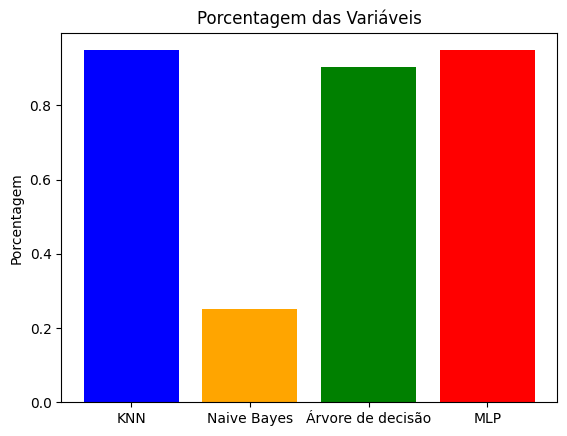

In [27]:
classifiers = ['KNN', 'Naive Bayes', 'Árvore de decisão', 'MLP']
percentages = [knn_classifier_accuracy, naive_bayes_classifier_accuracy, tree_classifier_accuracy, mlp_classifier_accuracy]

colors = ['blue', 'orange', 'green', 'red']
positions = range(len(classifiers))

plt.bar(positions, percentages, color=colors)

plt.xticks(positions, classifiers)
plt.ylabel('Porcentagem')

plt.title('Porcentagem das Variáveis')

plt.show()

Analisando os valores obtidos, percebe-se que o **classificador Naive Bayes apresentou a menor acurácia quando comparada com os outros algortimos**. Essa discrepância nos resultados ocorre principalmente devido ao fato de o *NB* ser um algoritmo simples, que se baseia em suposições que, muitas vezes, resultam na classificação incorreta da instância. Além disso, a ausência de parâmetros ajustáveis se configura como um fator limitante desse algoritmo. 

Já o algortimo da **Arvore de Decisão apresentou uma acurácia relativamente alta**. Vale ressaltar que esse algortimo geralmente possui um bom resultado quando se tem um conjunto de dados que apresentam características relevantes - como é o caso do dataset escolhido.

Já o **KNN e o MLP apresentaram os melhores resultados** - sendo aproximadamente iguais. Isso se deve principalmente ao fato de que esses algoritmos possuem parâmetros ajustáveis. Conforme ilustrado no presente projeto, ao realizar a busca em grade, são selecionados os melhores parâmetros para o problema em questão - garantindo assim um bom desempenho para ambos os algortimos.